In [19]:
import pandas as pd
from sqlalchemy import create_engine

# Modify the connection details
username = 'root'  # Replace with your MySQL username
password = '123456'  # Replace with your MySQL password
database = 'amazons'  # Replace with your database name
host = 'localhost'  # Assuming you're using localhost, otherwise change to your host
port = '3306'  # Default MySQL port is 3306

engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

# Step 2: Write your SQL query
query = 'SELECT * FROM mytable'

# Step 3: Execute the query and load data into a DataFrame
df = pd.read_sql(query, engine)

# Step 4: Display the first few rows of the DataFrame
print(df.head())

   product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B0088TKTY2  TP-LINK WiFi Dongle 300 Mbps Mini Wireless Net...   
2  B008FWZGSG  Samsung Original Type C to C Cable - 3.28 Feet...   
3  B008IFXQFU  TP-Link USB WiFi Adapter for PC(TL-WN725N), N1...   
4  B00NH11KIK  AmazonBasics USB 2.0 Cable - A-Male to B-Male ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹649   
2  Computers&Accessories|Accessories&Peripherals|...             ₹599   
3  Computers&Accessories|NetworkingDevices|Networ...             ₹499   
4  Computers&Accessories|Accessories&Peripherals|...             ₹209   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,399                 54%  

   total_sales_per_category                                           category
0                  16286.63  Computers&Accessories|Accessories&Peripherals|...
1                   2655.00  Computers&Accessories|NetworkingDevices|Networ...
2                   1315.00  Electronics|HomeTheater,TV&Video|Accessories|C...
3                    809.00  Electronics|HomeTheater,TV&Video|Accessories|R...
4                    218.00  Electronics|HomeTheater,TV&Video|Televisions|S...
5                     13.00  Electronics|HomeTheater,TV&Video|Televisions|S...
6                      1.00  Electronics|HomeTheater,TV&Video|Accessories|T...
Axes(0.125,0.11;0.775x0.77)


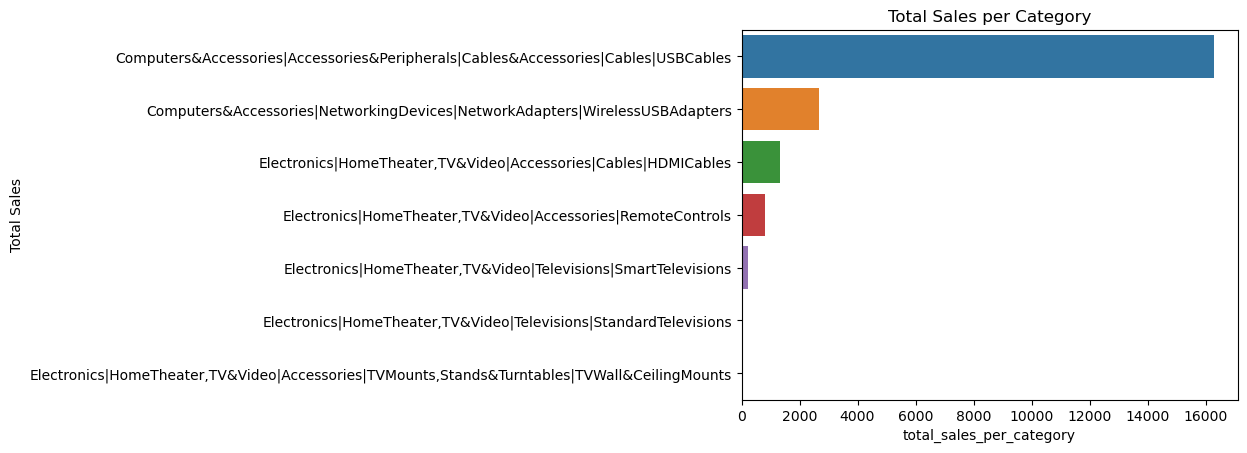

In [97]:
#TOTAL SALES PER CATEGORY
import matplotlib.pyplot as plt
import seaborn as sns





query =  "select SUM(CAST(REPLACE(discounted_price, '₹', '') AS DECIMAL(10,2))) as total_sales_per_category, category from mytable group by category ORDER BY total_sales_per_category DESC;"



# Step 3: Execute the query and load data into a DataFrame
a = pd.read_sql(query, engine)
print(a) 

h = sns.barplot(y='category', x='total_sales_per_category', data=a)
print(h)
plt.title('Total Sales per Category')


plt.ylabel('Total Sales')

# Step 5: Show the plot
plt.show()



   average_discount_per_category  \
0                      64.000000   
1                      59.600000   
2                      58.528302   
3                      49.000000   
4                      47.000000   
5                      46.500000   
6                      40.615385   

                                            category  
0  Electronics|HomeTheater,TV&Video|Accessories|R...  
1  Electronics|HomeTheater,TV&Video|Accessories|C...  
2  Computers&Accessories|Accessories&Peripherals|...  
3  Computers&Accessories|NetworkingDevices|Networ...  
4  Electronics|HomeTheater,TV&Video|Accessories|T...  
5  Electronics|HomeTheater,TV&Video|Televisions|S...  
6  Electronics|HomeTheater,TV&Video|Televisions|S...  
Axes(0.125,0.11;0.775x0.77)


Text(0.5, 1.0, 'Average Discount Percentage Category')

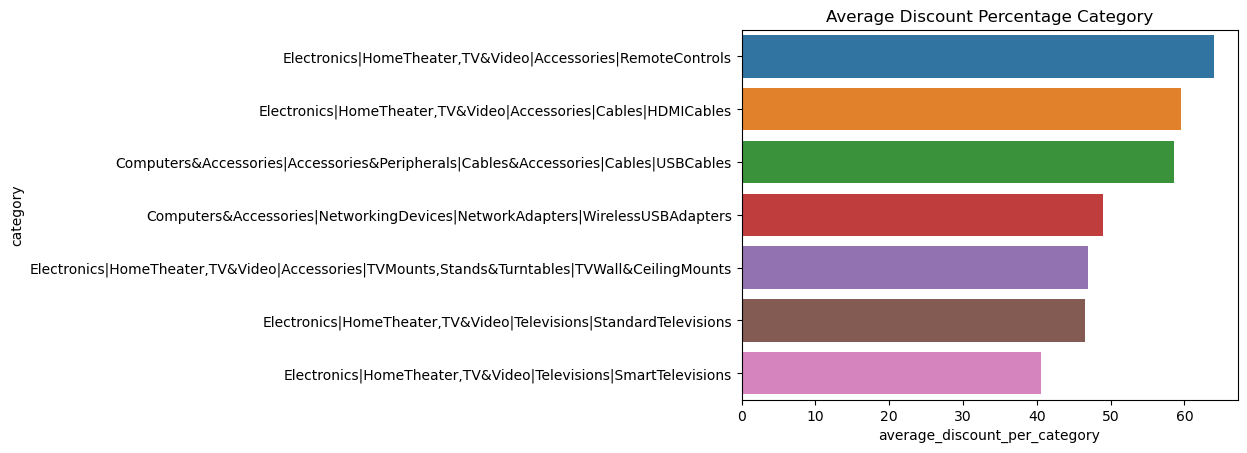

In [96]:
#/* Average discount percentage Category */
query="select avg(CAST(REPLACE(discount_percentage, '₹', '') AS DECIMAL(10,2))) as average_discount_per_category, category from mytable group by category ORDER BY average_discount_per_category DESC;"

b=pd.read_sql(query,engine)
print(b)

i=sns.barplot(y="category",x="average_discount_per_category",data=b)
print(i) 
plt.title("Average Discount Percentage Category")


<Axes: xlabel='rating', ylabel='product_name'>

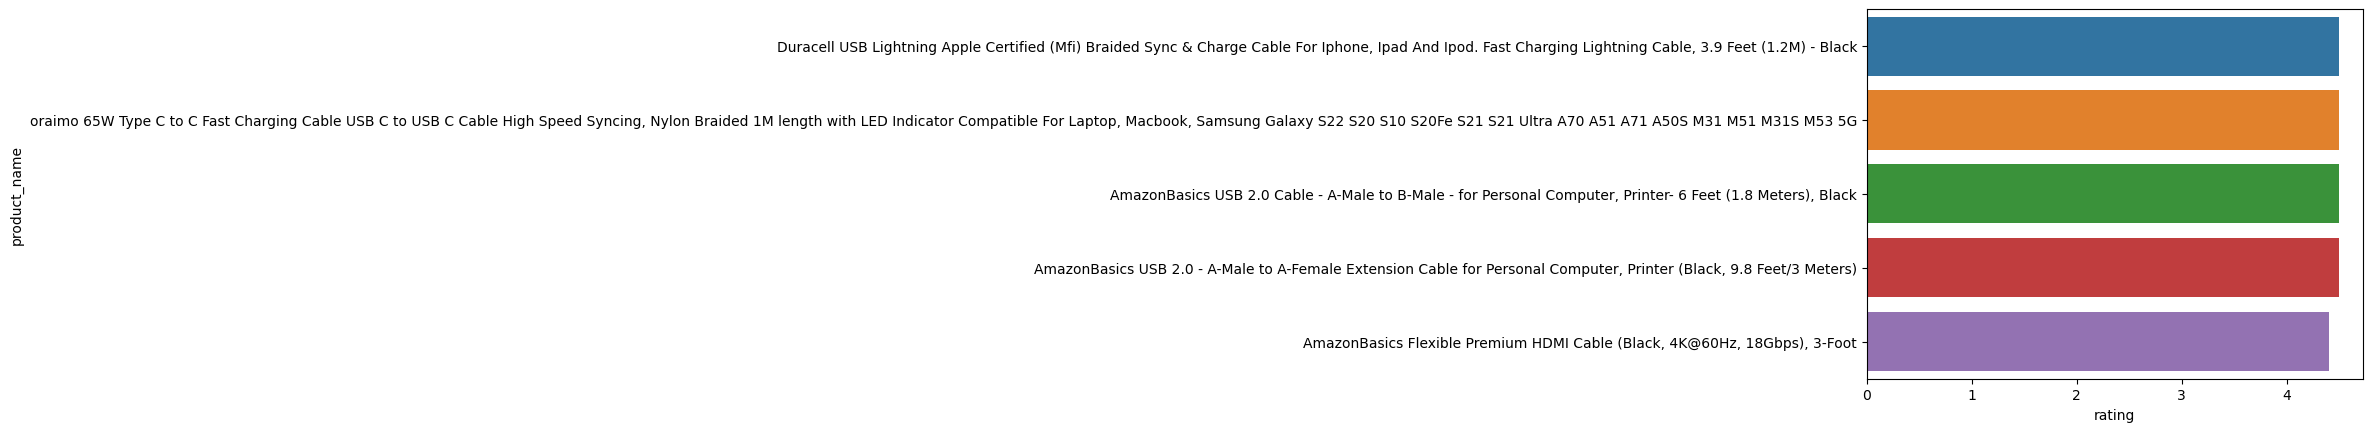

In [95]:
#/* Product Popularity Based on Ratings */

query="select product_id,product_name ,cast(rating as decimal(10,2)) as rating , category from mytable order by rating desc limit 5;"

c=pd.read_sql(query,engine)


sns.barplot(y="product_name",x="rating",data=c)







<Axes: xlabel='average_rating', ylabel='category'>

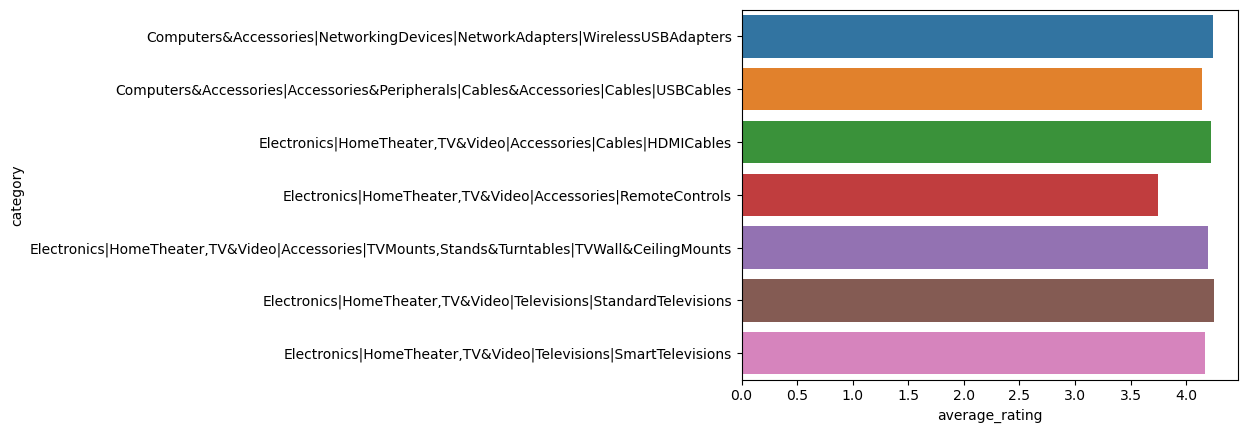

In [94]:
#/* Average Rating per Category */

query= "select avg(rating) as average_rating, category from mytable group by category; "

d=pd.read_sql(query,engine) 

sns.barplot(y="category",x="average_rating",data=d)



<Axes: xlabel='discount_percentages', ylabel='product_name'>

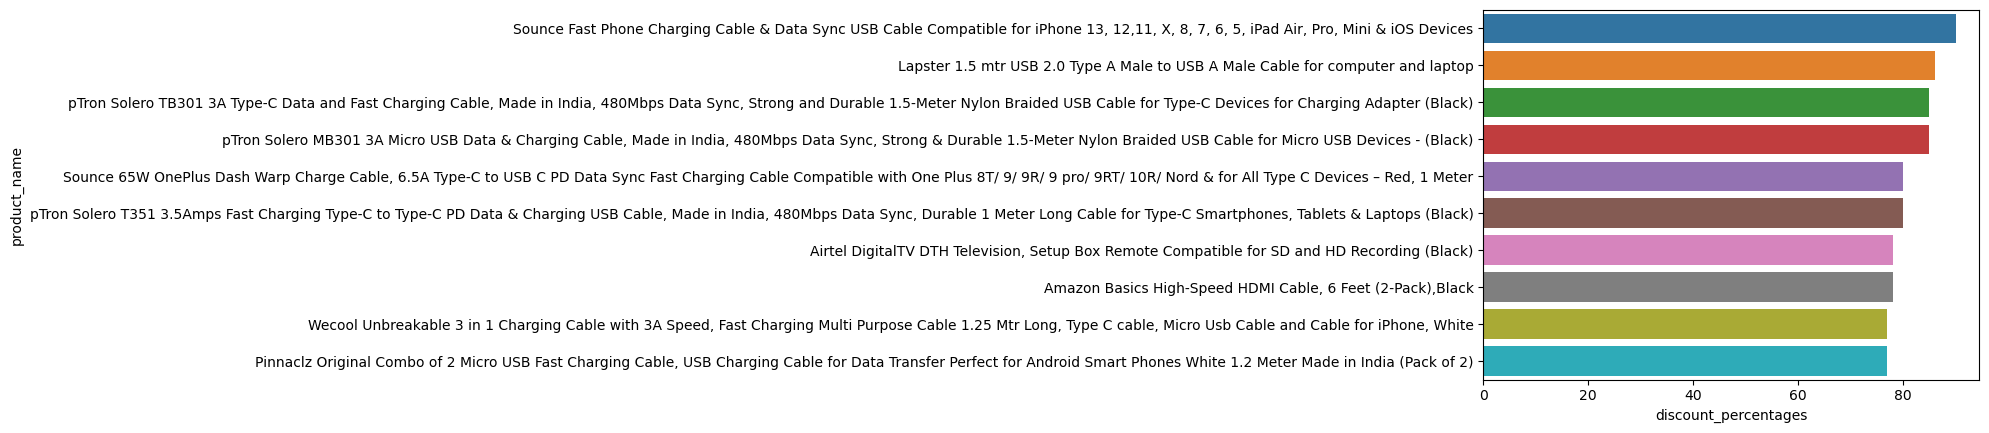

In [101]:
#/* Products with the Highest Discounts */

query= "select product_id,product_name,category,cast(discount_percentage as decimal(10,2)) as discount_percentages from mytable order by discount_percentage desc limit 10; "

e=pd.read_sql(query,engine)

sns.barplot(y="product_name",x="discount_percentages",data=e)




<Axes: xlabel='rating_counts', ylabel='product_name'>

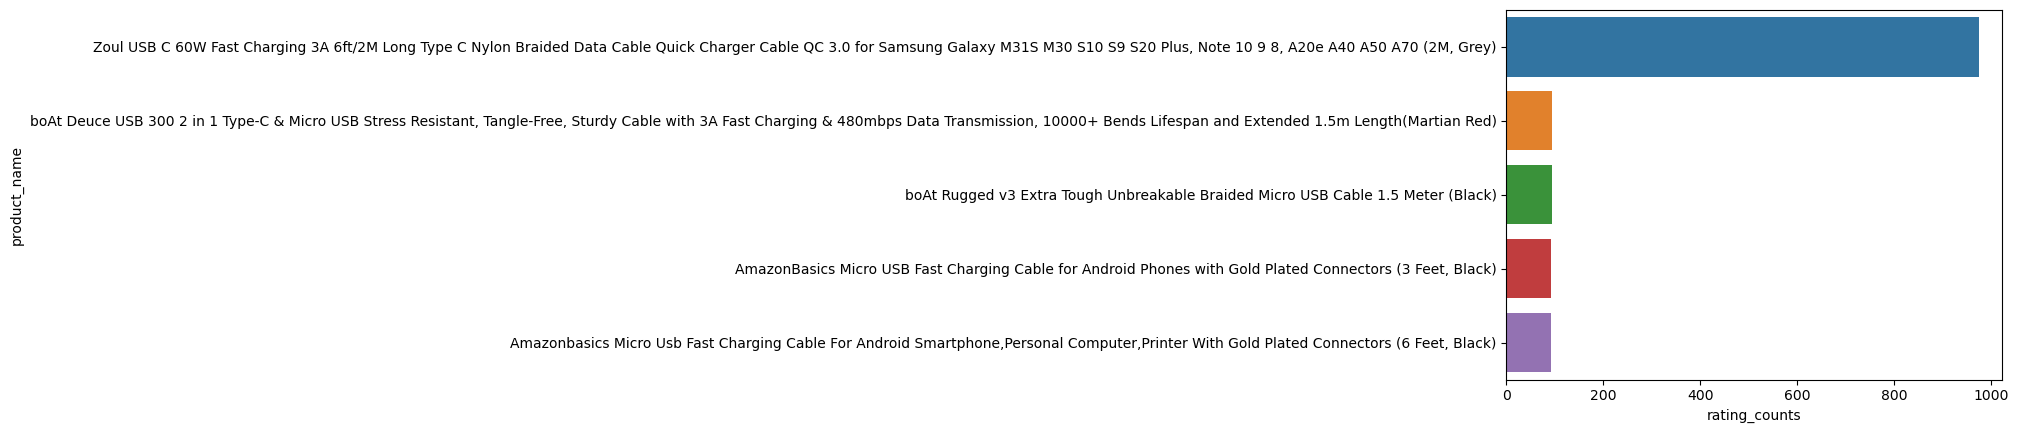

In [102]:
#/*  max rated Product  */

query="select product_id,product_name,category,cast(rating_count as decimal(10,2)) as rating_counts from mytable order by rating_count desc limit 5; "

f=pd.read_sql(query,engine)

sns.barplot(y="product_name",x="rating_counts",data=f)


([0, 1, 2, 3, 4],
 [Text(0, 0, 'ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam'),
  Text(1, 0, 'Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM'),
  Text(2, 0, '$@||TO$|-|,Sethu madhav,Akash Thakur,Burger Planet,Justice ⚖️,indrajyoti d.,Aditya Kumar,E.C.GEORGE'),
  Text(3, 0, 'Rishav Gossain,Shashank Mallamraju,Purnendu,gunasekaran desomayananam,Anto RK,Sukrit Basak,Manoj Kumar,Sethuram.S'),
  Text(4, 0, 'Neeraj Vishwakarma,Siddharth,SD1908,Mukundha2good,manjunath h,Vidhi Nigam,Amazon Customer,Tarun Gupta')])

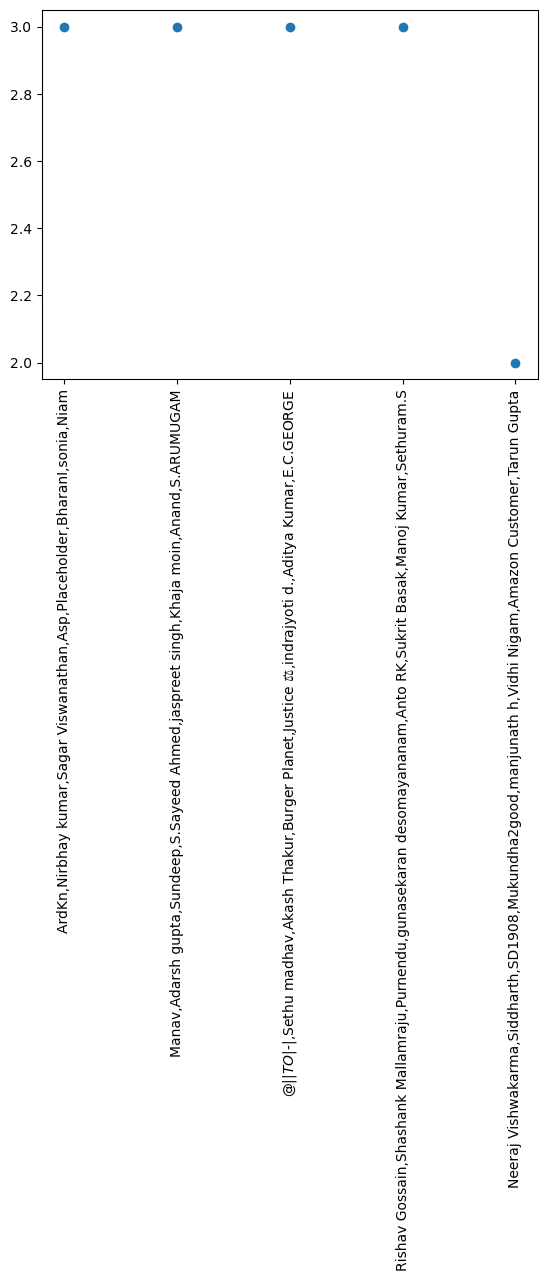

In [111]:
#/* Top 5 Users Who Have Given the Most Reviews */

query=" select user_name,count(rating) as count_rating from mytable group by user_name order by count_rating desc limit 5 ; "

f=pd.read_sql(query, engine)

plt.scatter(x="user_name",y="count_rating", data=f)
plt.xticks(rotation=90)





                                             category   Metric      Value
0   Computers&Accessories|NetworkingDevices|Networ...      min  38.000000
1   Computers&Accessories|Accessories&Peripherals|...      min   0.000000
2   Electronics|HomeTheater,TV&Video|Accessories|C...      min  35.000000
3   Electronics|HomeTheater,TV&Video|Accessories|R...      min  54.000000
4   Electronics|HomeTheater,TV&Video|Accessories|T...      min  47.000000
5   Electronics|HomeTheater,TV&Video|Televisions|S...      min  46.000000
6   Electronics|HomeTheater,TV&Video|Televisions|S...      min  25.000000
7   Computers&Accessories|NetworkingDevices|Networ...      max  58.000000
8   Computers&Accessories|Accessories&Peripherals|...      max  90.000000
9   Electronics|HomeTheater,TV&Video|Accessories|C...      max  78.000000
10  Electronics|HomeTheater,TV&Video|Accessories|R...      max  78.000000
11  Electronics|HomeTheater,TV&Video|Accessories|T...      max  47.000000
12  Electronics|HomeTheater,TV&Video|T

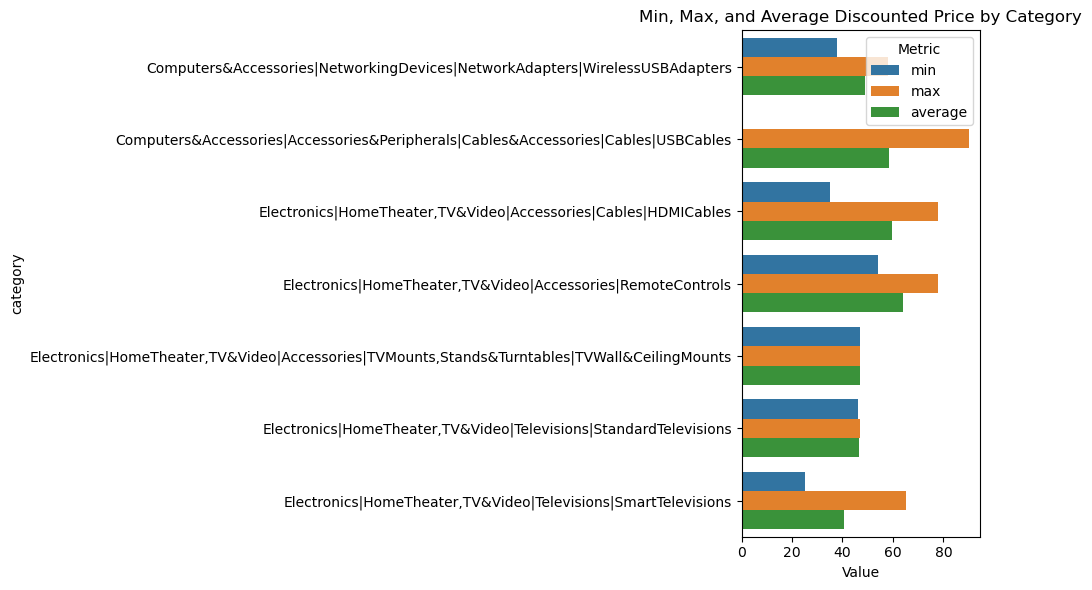

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Your query and connection details

query = """
    SELECT 
        min(CAST(REPLACE(discount_percentage, '₹', '') AS DECIMAL(10,2))) AS min,
        max(CAST(REPLACE(discount_percentage, '₹', '') AS DECIMAL(10,2))) AS max,
        AVG(CAST(REPLACE(discount_percentage, '₹', '') AS DECIMAL(10,2))) AS average,
        category 
    FROM mytable 
    GROUP BY category;
"""

# Fetch data
h = pd.read_sql(query, engine)

# Melt the DataFrame
h_long = h.melt(id_vars='category', value_vars=['min', 'max', 'average'], 
                var_name='Metric', value_name='Value')

# Check the DataFrame
print(h_long)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=h_long, y='category', x='Value', hue='Metric')

plt.title('Min, Max, and Average Discounted Price by Category')
plt.tight_layout()
plt.show()
